In [126]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sb

import statsmodels.api as smapi


In [127]:
df = pd.read_csv('Dataforforcast.csv', sep=',')
print(df.shape)
df.head()
df

(4, 6)


,Year,Population,Dwellings,Employed,Unemployed,Train
0,2001,4940,2515,1727,112,74
1,2006,4952,2541,2183,126,113
2,2011,5309,2747,2360,138,138
3,2016,5769,3072,2478,145,184


In [128]:
df.keys()

Index(['Year', 'Population', 'Dwellings', 'Employed', 'Unemployed', 'Train'], dtype='object')

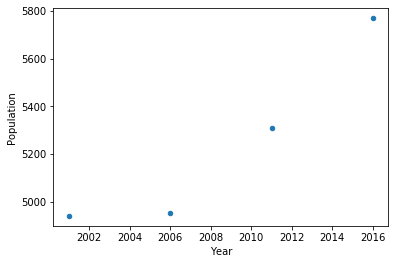

In [105]:
df.plot(kind = "scatter",x="Year",y="Population")

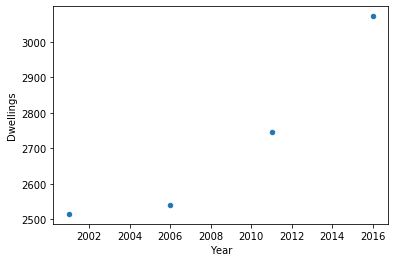

In [107]:
df.plot(kind = "scatter",x="Year",y="Dwellings")

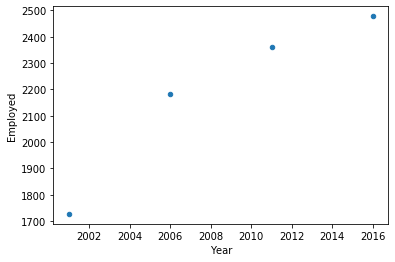

In [108]:
df.plot(kind = "scatter",x="Year",y="Employed")

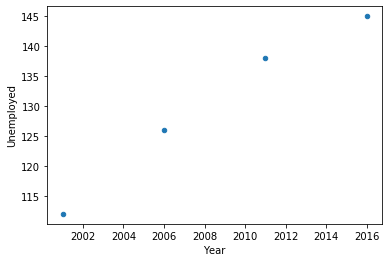

In [109]:
df.plot(kind = "scatter",x="Year",y="Unemployed")

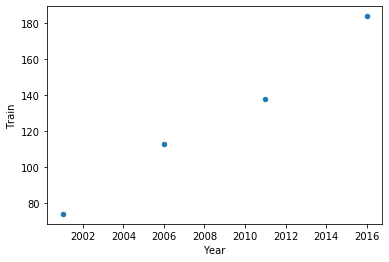

In [110]:
df.plot(kind = "scatter",x="Year",y="Train")

In [129]:
y = df.Train
x = df.Population
x = smapi.add_constant(x)

est=smapi.OLS(y, x)
est = est.fit()
est.summary()

C:\Users\Navjot\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Navjot\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Train   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     15.58
Date:                Mon, 11 May 2020   Prob (F-statistic):             0.0586
Time:                        12:40:40   Log-Likelihood:                -16.076
No. Observations:                   4   AIC:                             36.15
Df Residuals:                       2   BIC:                             34.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -455.3168    147.878     -3.079      0.091   -1091.583     180.949
Population     0.1111      0.028      3.948      0.059      -0.010       0.232
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.290
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.208
Skew:                          -0.172   Prob(JB):                        0.901
Kurtosis:                       1.936   Cond. No.                     8.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
df1 = df.T
df1


,0,1,2,3
Year,2001,2006,2011,2016
Population,4940,4952,5309,5769
Dwellings,2515,2541,2747,3072
Employed,1727,2183,2360,2478
Unemployed,112,126,138,145
Train,74,113,138,184


In [113]:
df1.to_csv("transposeddata.csv", index = False)

In [135]:
header_names = ['Y2001','Y2006','Y2011','Y2016']
df2 =pd.read_csv ("transposeddata.csv",header=None,skiprows=2,names=header_names)
df2

,Y2001,Y2006,Y2011,Y2016
0,4940,4952,5309,5769
1,2515,2541,2747,3072
2,1727,2183,2360,2478
3,112,126,138,145
4,74,113,138,184


In [136]:
# Calculation of growth rate
for ind, row in df2.iterrows():
    df2.loc[ind,"Growth Rate 2016-2011"] = (row['Y2016']-row['Y2011']) / row['Y2011']
for ind, row in df2.iterrows():
    df2.loc[ind,"Growth Rate 2011-2006"] = (row['Y2011']-row['Y2006']) / row['Y2006']
for ind, row in df2.iterrows():
    df2.loc[ind,"Growth Rate 2006-2001"] = (row['Y2006']-row['Y2001']) / row['Y2001']


df2

,Y2001,Y2006,Y2011,Y2016,Growth Rate 2016-2011,Growth Rate 2011-2006,Growth Rate 2006-2001
0,4940,4952,5309,5769,0.086645,0.072092,0.002429
1,2515,2541,2747,3072,0.118311,0.081070,0.010338
2,1727,2183,2360,2478,0.050000,0.081081,0.264042
3,112,126,138,145,0.050725,0.095238,0.125000
4,74,113,138,184,0.333333,0.221239,0.527027


In [124]:
#The growth rate of population and dwelling decreses over time but that of employed people, unemployed people and numer of 
#people travelling in trains increses


In [137]:
for ind, row in df2.iterrows():
    df2.loc[ind,"Y2021"] = (row['Y2016']*(1+row['Growth Rate 2016-2011']))
for ind, row in df2.iterrows():
    df2.loc[ind,"Growth Rate 2021-2016"] = (row['Y2021']-row['Y2016']) / row['Y2016']
for ind, row in df2.iterrows():
    df2.loc[ind,"Y2021"] = (row['Y2016']*(1+row['Growth Rate 2016-2011']))
for ind, row in df2.iterrows():
    df2.loc[ind,"Y2026"] = (row['Y2021']*(1+row['Growth Rate 2021-2016']))
for ind, row in df2.iterrows():
    df2.loc[ind,"Growth Rate 2026-2021"] = (row['Y2026']-row['Y2021']) / row['Y2021']
for ind, row in df2.iterrows():
    df2.loc[ind,"Y2031"] = (row['Y2026']*(1+row['Growth Rate 2026-2021']))
df2

,Y2001,Y2006,Y2011,Y2016,Growth Rate 2016-2011,Growth Rate 2011-2006,Growth Rate 2006-2001,Y2021,Growth Rate 2021-2016,Y2026,Growth Rate 2026-2021,Y2031
0,4940,4952,5309,5769,0.086645,0.072092,0.002429,6268.856847,0.086645,6812.023950,0.086645,7402.253940
1,2515,2541,2747,3072,0.118311,0.081070,0.010338,3435.451037,0.118311,3841.902289,0.118311,4296.441147
2,1727,2183,2360,2478,0.050000,0.081081,0.264042,2601.900000,0.050000,2731.995000,0.050000,2868.594750
3,112,126,138,145,0.050725,0.095238,0.125000,152.355072,0.050725,160.083228,0.050725,168.203392
4,74,113,138,184,0.333333,0.221239,0.527027,245.333333,0.333333,327.111111,0.333333,436.148148


In [138]:
df2.Y2031 = df2.Y2031.round()
df2

,Y2001,Y2006,Y2011,Y2016,Growth Rate 2016-2011,Growth Rate 2011-2006,Growth Rate 2006-2001,Y2021,Growth Rate 2021-2016,Y2026,Growth Rate 2026-2021,Y2031
0,4940,4952,5309,5769,0.086645,0.072092,0.002429,6268.856847,0.086645,6812.023950,0.086645,7402.0
1,2515,2541,2747,3072,0.118311,0.081070,0.010338,3435.451037,0.118311,3841.902289,0.118311,4296.0
2,1727,2183,2360,2478,0.050000,0.081081,0.264042,2601.900000,0.050000,2731.995000,0.050000,2869.0
3,112,126,138,145,0.050725,0.095238,0.125000,152.355072,0.050725,160.083228,0.050725,168.0
4,74,113,138,184,0.333333,0.221239,0.527027,245.333333,0.333333,327.111111,0.333333,436.0


In [139]:
df3 = df2.T
df3

,0,1,2,3,4
Y2001,4940.000000,2515.000000,1727.000000,112.000000,74.000000
Y2006,4952.000000,2541.000000,2183.000000,126.000000,113.000000
Y2011,5309.000000,2747.000000,2360.000000,138.000000,138.000000
Y2016,5769.000000,3072.000000,2478.000000,145.000000,184.000000
Growth Rate 2016-2011,0.086645,0.118311,0.050000,0.050725,0.333333
Growth Rate 2011-2006,0.072092,0.081070,0.081081,0.095238,0.221239
Growth Rate 2006-2001,0.002429,0.010338,0.264042,0.125000,0.527027
Y2021,6268.856847,3435.451037,2601.900000,152.355072,245.333333
Growth Rate 2021-2016,0.086645,0.118311,0.050000,0.050725,0.333333
Y2026,6812.023950,3841.902289,2731.995000,160.083228,327.111111


In [140]:
df3.columns = ['Population','Dwellings','Employed','Unemployed','Train_pop']
df3

,Population,Dwellings,Employed,Unemployed,Train_pop
Y2001,4940.000000,2515.000000,1727.000000,112.000000,74.000000
Y2006,4952.000000,2541.000000,2183.000000,126.000000,113.000000
Y2011,5309.000000,2747.000000,2360.000000,138.000000,138.000000
Y2016,5769.000000,3072.000000,2478.000000,145.000000,184.000000
Growth Rate 2016-2011,0.086645,0.118311,0.050000,0.050725,0.333333
Growth Rate 2011-2006,0.072092,0.081070,0.081081,0.095238,0.221239
Growth Rate 2006-2001,0.002429,0.010338,0.264042,0.125000,0.527027
Y2021,6268.856847,3435.451037,2601.900000,152.355072,245.333333
Growth Rate 2021-2016,0.086645,0.118311,0.050000,0.050725,0.333333
Y2026,6812.023950,3841.902289,2731.995000,160.083228,327.111111
